# Predicting ATP Matches

### Import packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read data

In [2]:
#tennis_data_list = []
#
#for i in range(2010, 2022):
#    
#    tennis_data_list.append(pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_' + str(i) + '.csv'))

In [5]:
#tennis = pd.concat(tennis_data_list, ignore_index = True)

tennis = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv')
tennis.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0


In [6]:
tennis.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

#### Create a copy to work on

In [7]:
tennis_data = tennis.copy()

In [8]:
atp_all = tennis_data.dropna(subset = ['w_df']).reset_index().drop('index', axis = 1)
atp_all.shape

(2694, 49)

#### Column names for winners and losers

In [9]:
winner_cols = [col for col in atp_all.columns if col.startswith('winner') or col.startswith('w_')]
loser_cols = [col for col in atp_all.columns if col.startswith('loser') or col.startswith('l_')]
common_cols = ['tourney_name', 'tourney_date', 'round', 'match_num']

### Get separate dataframes for winners and losers

In [10]:
atp_winner = atp_all[winner_cols + common_cols]
atp_loser = atp_all[loser_cols + common_cols]

### Indicate whether player has won or not

In [11]:
atp_winner['won'] = 1
atp_loser['won'] = 0

### Rename columns for winners and losers

In [12]:
new_column_names = [col.replace('winner', 'player') for col in winner_cols]
new_column_names = [col.replace('w_', 'player_') for col in new_column_names]

atp_winner.columns = new_column_names + common_cols + ['won']

In [13]:
atp_winner.head()

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,player_ace,player_df,...,player_SvGms,player_bpSaved,player_bpFaced,player_rank,player_rank_points,tourney_name,tourney_date,round,match_num,won
0,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,3.0,3.0,...,13.0,3.0,6.0,9.0,3590.0,Brisbane,20181231,F,300,1
1,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,10.0,1.0,...,10.0,0.0,1.0,16.0,1977.0,Brisbane,20181231,SF,299,1
2,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,2.0,2.0,...,8.0,2.0,2.0,9.0,3590.0,Brisbane,20181231,SF,298,1
3,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,12.0,2.0,...,11.0,4.0,5.0,239.0,200.0,Brisbane,20181231,QF,297,1
4,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,12.0,3.0,...,16.0,8.0,8.0,16.0,1977.0,Brisbane,20181231,QF,296,1


### Make the columns the same

In [14]:
atp_loser.columns = atp_winner.columns

atp_long = atp_winner.append(atp_loser)
atp_long.head()

,player_id,player_seed,player_entry,player_name,player_hand,player_ht,player_ioc,player_age,player_ace,player_df,...,player_SvGms,player_bpSaved,player_bpFaced,player_rank,player_rank_points,tourney_name,tourney_date,round,match_num,won
0,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,3.0,3.0,...,13.0,3.0,6.0,9.0,3590.0,Brisbane,20181231,F,300,1
1,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,10.0,1.0,...,10.0,0.0,1.0,16.0,1977.0,Brisbane,20181231,SF,299,1
2,105453,2.0,NaN,Kei Nishikori,R,178.0,JPN,29.0,2.0,2.0,...,8.0,2.0,2.0,9.0,3590.0,Brisbane,20181231,SF,298,1
3,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.7,12.0,2.0,...,11.0,4.0,5.0,239.0,200.0,Brisbane,20181231,QF,297,1
4,106421,4.0,NaN,Daniil Medvedev,R,198.0,RUS,22.8,12.0,3.0,...,16.0,8.0,8.0,16.0,1977.0,Brisbane,20181231,QF,296,1


### Create the features of the game and apply to the dataframe

In [15]:
def in_game_features(df):
    
    df['Player_Serve_Point_Win_Ratio'] = (df.player_1stWon + df.player_2ndWon - df.player_df) / df.player_svpt
    df['Player_Average_Break_Points_Faced'] = df.player_bpFaced / df.player_SvGms
    
    return df

In [16]:
df_long_atp = in_game_features(atp_long)

# Keep only the columns to be used in the model

In [17]:
atp_relevant_features = df_long_atp.loc[:, ['player_name', 'player_hand', 'player_age', 'player_rank',
                                          'tourney_name', 'tourney_date', 'round', 'match_num', 'Player_Serve_Point_Win_Ratio',
                                           'Player_Average_Break_Points_Faced', 'won']]

In [18]:
atp_relevant_features.head()

,player_name,player_hand,player_age,player_rank,tourney_name,tourney_date,round,match_num,Player_Serve_Point_Win_Ratio,Player_Average_Break_Points_Faced,won
0,Kei Nishikori,R,29.0,9.0,Brisbane,20181231,F,300,0.584416,0.461538,1
1,Daniil Medvedev,R,22.8,16.0,Brisbane,20181231,SF,299,0.788462,0.100000,1
2,Kei Nishikori,R,29.0,9.0,Brisbane,20181231,SF,298,0.702128,0.250000,1
3,Jo-Wilfried Tsonga,R,33.7,239.0,Brisbane,20181231,QF,297,0.691176,0.454545,1
4,Daniil Medvedev,R,22.8,16.0,Brisbane,20181231,QF,296,0.666667,0.500000,1


### Randomize winners and losers

In [19]:
tennis_randomized = tennis.copy().dropna(subset = ['w_df']).reset_index().drop('index', axis = 1)

np.random.seed(181)
tennis_randomized['random_number'] = np.random.randint(2, size = len(tennis_randomized))
tennis_randomized['randomised_player_1'] = np.where(tennis_randomized['random_number'] == 0, tennis_randomized['winner_name'], tennis_randomized['loser_name'])
tennis_randomized['randomised_player_2'] = np.where(tennis_randomized['random_number'] == 0, tennis_randomized['loser_name'], tennis_randomized['winner_name'])
tennis_randomized.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,random_number,randomised_player_1,randomised_player_2
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,1,Daniil Medvedev,Kei Nishikori
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,1,Jo-Wilfried Tsonga,Daniil Medvedev
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,1,Jeremy Chardy,Kei Nishikori
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,1,Alex De Minaur,Jo-Wilfried Tsonga
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,0,Daniil Medvedev,Milos Raonic


# Set win/loss based on new number

In [20]:
tennis_randomized['player_1_win'] = np.where(tennis_randomized['random_number'] == 0, 1, 0)

In [21]:
print('Using numpy to randomise, the data gives player 1 a win percentage rate of: {}'.format(tennis_randomized['player_1_win'].mean() * 100))

Using numpy to randomise, the data gives player 1 a win percentage rate of: 49.33184855233853


In [22]:
relevant_tennis = tennis_randomized.loc[:, ['winner_name', 'loser_name', 'tourney_name', 'tourney_date', 'round',
                                            'surface', 'match_num', 'winner_hand', 'winner_age', 'loser_hand',
                                            'loser_age', 'best_of', 'winner_rank', 'loser_rank',
                                            'randomised_player_1', 'randomised_player_2', 'player_1_win']]


cols_to_keep = ['winner_name', 'loser_name', 'tourney_name', 'tourney_date', 'round', 'match_num', 'player_1_win', 'randomised_player_1',
               'randomised_player_2', 'surface', 'best_of']

atp_data = relevant_tennis[cols_to_keep]

In [23]:
atp_data.head()

,winner_name,loser_name,tourney_name,tourney_date,round,match_num,player_1_win,randomised_player_1,randomised_player_2,surface,best_of
0,Kei Nishikori,Daniil Medvedev,Brisbane,20181231,F,300,0,Daniil Medvedev,Kei Nishikori,Hard,3
1,Daniil Medvedev,Jo-Wilfried Tsonga,Brisbane,20181231,SF,299,0,Jo-Wilfried Tsonga,Daniil Medvedev,Hard,3
2,Kei Nishikori,Jeremy Chardy,Brisbane,20181231,SF,298,0,Jeremy Chardy,Kei Nishikori,Hard,3
3,Jo-Wilfried Tsonga,Alex De Minaur,Brisbane,20181231,QF,297,0,Alex De Minaur,Jo-Wilfried Tsonga,Hard,3
4,Daniil Medvedev,Milos Raonic,Brisbane,20181231,QF,296,1,Daniil Medvedev,Milos Raonic,Hard,3


# Get the rolling features

In [24]:
atp_rolling = atp_relevant_features.copy()

atp_rolling['tourney_date'] = pd.to_datetime(atp_rolling['tourney_date'], format = '%Y%m%d')

atp_sorted = atp_rolling.copy().sort_values(['player_name', 'tourney_date', 'tourney_name'], ascending = True)

rank_age = atp_sorted.set_index(['tourney_date', 'round', 'tourney_name']).groupby('player_name')['player_hand', 'player_age', 'player_rank'].rolling(1, min_periods = 1).mean().reset_index()
stats_games = atp_sorted.set_index(['tourney_date', 'round', 'tourney_name']).groupby('player_name')['Player_Serve_Point_Win_Ratio',
                                             'Player_Average_Break_Points_Faced'].rolling(15, min_periods = 1).mean().reset_index()
player_hand = atp_sorted.set_index(['tourney_date', 'round', 'tourney_name']).groupby('player_name')['player_hand'].last().reset_index()


player_stats_int = stats_games.copy().merge(rank_age, how = 'left',
                                 left_on = ['player_name', 'tourney_date', 'tourney_name', 'round'],
                                 right_on = ['player_name', 'tourney_date', 'tourney_name', 'round'])

player_stats = player_stats_int.copy().merge(player_hand, how = 'left', left_on = 'player_name',
                                            right_on = 'player_name')

rolling_atp_vals = atp_data.copy()
rolling_atp_vals['tourney_date'] = pd.to_datetime(rolling_atp_vals['tourney_date'], format = '%Y%m%d')


rolling_atp_vals.randomised_player_1 = rolling_atp_vals.randomised_player_1.str.strip()
rolling_atp_vals.tourney_name = rolling_atp_vals.tourney_name.str.strip()
rolling_atp_vals['round'] = rolling_atp_vals['round'].str.strip()
player_stats.player_name = player_stats.player_name.str.strip()
player_stats.tourney_name = player_stats.tourney_name.str.strip()
player_stats['round'] = player_stats['round'].str.strip()



atp_data_inter_rolling = rolling_atp_vals.copy().merge(player_stats, how = 'left',
                          left_on = ['randomised_player_1', 'tourney_name', 'tourney_date', 'round'],
                          right_on = ['player_name', 'tourney_name', 'tourney_date', 'round'])  #,
                          #validate = 'm:1')
    
atp_rolling_final = atp_data_inter_rolling.copy().merge(player_stats, how = 'left',
                         left_on = ['randomised_player_2', 'tourney_name', 'tourney_date', 'round'],
                         right_on = ['player_name', 'tourney_name', 'tourney_date', 'round'],
                          suffixes = ('_p1', '_p2'))

rolling_no_duplicates = atp_rolling_final.drop_duplicates(subset = ['winner_name', 'loser_name', 'tourney_name', 'tourney_date',
                                           'round'])



In [25]:
def transform_atp_df(sorted_df, stats_df, past_matches):
    
    atp_rolling = sorted_df.copy()

    atp_rolling['tourney_date'] = pd.to_datetime(atp_rolling['tourney_date'], format = '%Y%m%d')

    atp_sorted = atp_rolling.copy().sort_values(['player_name', 'tourney_date', 'tourney_name'], ascending = True)

    rank_age = atp_sorted.set_index(['tourney_date', 'round', 'tourney_name']).groupby('player_name')['player_hand', 'player_age', 'player_rank'].rolling(1, min_periods = 1).mean().reset_index()
    stats_games = atp_sorted.set_index(['tourney_date', 'round', 'tourney_name']).groupby('player_name')['Player_Serve_Point_Win_Ratio',
                                                 'Player_Average_Break_Points_Faced'].rolling(past_matches, min_periods = 1).mean().reset_index()
    player_hand = atp_sorted.set_index(['tourney_date', 'round', 'tourney_name']).groupby('player_name')['player_hand'].last().reset_index()


    player_stats_int = stats_games.copy().merge(rank_age, how = 'left',
                                     left_on = ['player_name', 'tourney_date', 'tourney_name', 'round'],
                                     right_on = ['player_name', 'tourney_date', 'tourney_name', 'round'])

    player_stats = player_stats_int.copy().merge(player_hand, how = 'left', left_on = 'player_name',
                                                right_on = 'player_name')

    rolling_atp_vals = stats_df.copy()
    rolling_atp_vals['tourney_date'] = pd.to_datetime(rolling_atp_vals['tourney_date'], format = '%Y%m%d')


    atp_data_inter_rolling = rolling_atp_vals.copy().merge(player_stats, how = 'left',
                              left_on = ['randomised_player_1', 'tourney_name', 'tourney_date', 'round'],
                              right_on = ['player_name', 'tourney_name', 'tourney_date', 'round'])#,
                              #validate = 'm:1')

    atp_rolling_final = atp_data_inter_rolling.copy().merge(player_stats, how = 'left',
                             left_on = ['randomised_player_2', 'tourney_name', 'tourney_date', 'round'],
                             right_on = ['player_name', 'tourney_name', 'tourney_date', 'round'],
                              suffixes = ('_p1', '_p2'))

    rolling_no_duplicates = atp_rolling_final.drop_duplicates(subset = ['winner_name', 'loser_name', 'tourney_name', 'tourney_date',
                                               'round'])
    
    return rolling_no_duplicates

In [26]:
rolling_formatted = transform_atp_df(atp_relevant_features, atp_data, 15)
rolling_formatted

,winner_name,loser_name,tourney_name,tourney_date,round,match_num,player_1_win,randomised_player_1,randomised_player_2,surface,...,Player_Average_Break_Points_Faced_p1,player_age_p1,player_rank_p1,player_hand_p1,player_name_p2,Player_Serve_Point_Win_Ratio_p2,Player_Average_Break_Points_Faced_p2,player_age_p2,player_rank_p2,player_hand_p2
0,Kei Nishikori,Daniil Medvedev,Brisbane,2018-12-31,F,300,0,Daniil Medvedev,Kei Nishikori,Hard,...,0.442857,22.8,16.0,R,Kei Nishikori,0.584416,0.461538,29.0,9.0,R
1,Daniil Medvedev,Jo-Wilfried Tsonga,Brisbane,2018-12-31,SF,299,0,Jo-Wilfried Tsonga,Daniil Medvedev,Hard,...,0.681818,33.7,239.0,R,Daniil Medvedev,0.788462,0.100000,22.8,16.0,R
2,Kei Nishikori,Jeremy Chardy,Brisbane,2018-12-31,SF,298,0,Jeremy Chardy,Kei Nishikori,Hard,...,0.364583,31.8,40.0,R,Kei Nishikori,0.643272,0.355769,29.0,9.0,R
3,Jo-Wilfried Tsonga,Alex De Minaur,Brisbane,2018-12-31,QF,297,0,Alex De Minaur,Jo-Wilfried Tsonga,Hard,...,0.348485,19.8,31.0,R,Jo-Wilfried Tsonga,0.691176,0.454545,33.7,239.0,R
4,Daniil Medvedev,Milos Raonic,Brisbane,2018-12-31,QF,296,1,Daniil Medvedev,Milos Raonic,Hard,...,0.300000,22.8,16.0,R,Milos Raonic,0.746156,0.088889,28.0,18.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,Frances Tiafoe,Mikael Ymer,NextGen Finals,2019-11-05,RR,290,1,Frances Tiafoe,Mikael Ymer,Hard,...,0.592511,21.7,47.0,R,Mikael Ymer,0.531609,0.729149,21.1,74.0,R
4590,Jannik Sinner,Frances Tiafoe,NextGen Finals,2019-11-05,RR,289,0,Frances Tiafoe,Jannik Sinner,Hard,...,0.592511,21.7,47.0,R,Jannik Sinner,0.621496,0.549609,18.2,95.0,R
4671,Mikael Ymer,Ugo Humbert,NextGen Finals,2019-11-05,RR,288,0,Ugo Humbert,Mikael Ymer,Hard,...,0.510015,21.3,55.0,L,Mikael Ymer,0.531609,0.729149,21.1,74.0,R
4752,Ugo Humbert,Jannik Sinner,NextGen Finals,2019-11-05,RR,287,1,Ugo Humbert,Jannik Sinner,Hard,...,0.510015,21.3,55.0,L,Jannik Sinner,0.621496,0.549609,18.2,95.0,R


# Calculate difference

In [27]:
def match_differences_rolling(df, diff_cols = None):
    
    p1_cols = [i + '_p1' for i in diff_cols]
    p2_cols = [i + '_p2' for i in diff_cols]
    
    # I have filled the NaN in here because these values seem to be missing at random,
    # so I believe that replacing them with the mean is justified
    
    df['player_rank_p1'] = df['player_rank_p1'].fillna(round(df['player_rank_p1'].mean()))
    df['player_rank_p2'] = df['player_rank_p2'].fillna(round(df['player_rank_p2'].mean()))
    
    new_column_name = [i + '_diff' for i in diff_cols]
    
    df_p1 = df[p1_cols]
    df_p2 = df[p2_cols]
    
    df_p1.columns = new_column_name
    df_p2.columns = new_column_name
    
    df_diff = df_p1 - df_p2
    df_diff.columns = new_column_name
    
    df.drop(p1_cols + p2_cols, axis = 1, inplace = True)
           
    df = pd.concat([df, df_diff], axis = 1)
    
    return df, new_column_name

In [28]:
diff_cols = ['Player_Serve_Point_Win_Ratio', 'Player_Average_Break_Points_Faced', 'player_rank', 'player_age']

atp_rolling_differences, roll_vals = match_differences_rolling(rolling_formatted, diff_cols = diff_cols)

In [29]:
atp_rolling_differences

,winner_name,loser_name,tourney_name,tourney_date,round,match_num,player_1_win,randomised_player_1,randomised_player_2,surface,best_of,player_name_p1,player_hand_p1,player_name_p2,player_hand_p2,Player_Serve_Point_Win_Ratio_diff,Player_Average_Break_Points_Faced_diff,player_rank_diff,player_age_diff
0,Kei Nishikori,Daniil Medvedev,Brisbane,2018-12-31,F,300,0,Daniil Medvedev,Kei Nishikori,Hard,3,Daniil Medvedev,R,Kei Nishikori,R,0.075292,-0.018681,7.0,-6.2
1,Daniil Medvedev,Jo-Wilfried Tsonga,Brisbane,2018-12-31,SF,299,0,Jo-Wilfried Tsonga,Daniil Medvedev,Hard,3,Jo-Wilfried Tsonga,R,Daniil Medvedev,R,-0.163060,0.581818,223.0,10.9
2,Kei Nishikori,Jeremy Chardy,Brisbane,2018-12-31,SF,298,0,Jeremy Chardy,Kei Nishikori,Hard,3,Jeremy Chardy,R,Kei Nishikori,R,-0.053512,0.008814,31.0,2.8
3,Jo-Wilfried Tsonga,Alex De Minaur,Brisbane,2018-12-31,QF,297,0,Alex De Minaur,Jo-Wilfried Tsonga,Hard,3,Alex De Minaur,R,Jo-Wilfried Tsonga,R,-0.036287,-0.106061,-208.0,-13.9
4,Daniil Medvedev,Milos Raonic,Brisbane,2018-12-31,QF,296,1,Daniil Medvedev,Milos Raonic,Hard,3,Daniil Medvedev,R,Milos Raonic,R,-0.018592,0.211111,-2.0,-5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,Frances Tiafoe,Mikael Ymer,NextGen Finals,2019-11-05,RR,290,1,Frances Tiafoe,Mikael Ymer,Hard,3,Frances Tiafoe,R,Mikael Ymer,R,0.101332,-0.136638,-27.0,0.6
4590,Jannik Sinner,Frances Tiafoe,NextGen Finals,2019-11-05,RR,289,0,Frances Tiafoe,Jannik Sinner,Hard,3,Frances Tiafoe,R,Jannik Sinner,R,0.011445,0.042901,-48.0,3.5
4671,Mikael Ymer,Ugo Humbert,NextGen Finals,2019-11-05,RR,288,0,Ugo Humbert,Mikael Ymer,Hard,3,Ugo Humbert,L,Mikael Ymer,R,0.073976,-0.219133,-19.0,0.2
4752,Ugo Humbert,Jannik Sinner,NextGen Finals,2019-11-05,RR,287,1,Ugo Humbert,Jannik Sinner,Hard,3,Ugo Humbert,L,Jannik Sinner,R,-0.015911,-0.039594,-40.0,3.1


# Add hand they play with

In [30]:
def atp_same_hand(df):
    df['same_hand'] = np.where(df['player_hand_p1'] == df['player_hand_p2'], 1, 0)
    
    return df

In [31]:
atp_final_data = atp_same_hand(atp_rolling_differences)

### Get columns

In [32]:
columns_for_model = ['surface', 'best_of', 'Player_Serve_Point_Win_Ratio_diff', 'Player_Average_Break_Points_Faced_diff',
                    'player_rank_diff', 'player_age_diff', 'same_hand', 'player_1_win']

atp_modelling_data = atp_final_data.loc[:, columns_for_model]
atp_modelling_data.head()

,surface,best_of,Player_Serve_Point_Win_Ratio_diff,Player_Average_Break_Points_Faced_diff,player_rank_diff,player_age_diff,same_hand,player_1_win
0,Hard,3,0.075292,-0.018681,7.0,-6.2,1,0
1,Hard,3,-0.163060,0.581818,223.0,10.9,1,0
2,Hard,3,-0.053512,0.008814,31.0,2.8,1,0
3,Hard,3,-0.036287,-0.106061,-208.0,-13.9,1,0
4,Hard,3,-0.018592,0.211111,-2.0,-5.2,1,1


In [33]:
def plot_tennis_features(df, feature1, feature2):

    plt.figure(figsize = (10, 7))
    plt.scatter(df[feature1], df[feature2], 
               c = df['player_1_win'])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid()
    plt.show()
    

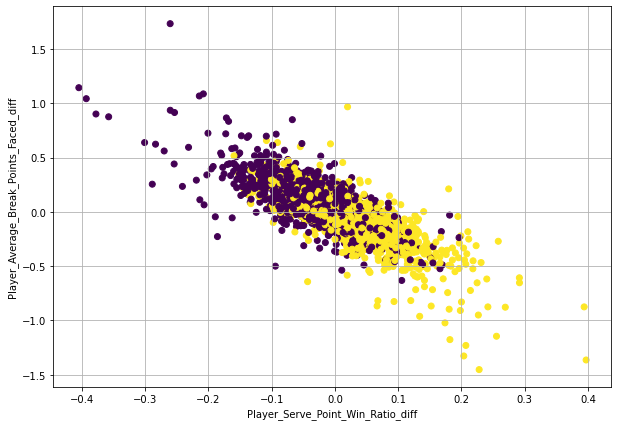

In [34]:
plot_tennis_features(atp_modelling_data, 'Player_Serve_Point_Win_Ratio_diff', 'Player_Average_Break_Points_Faced_diff')

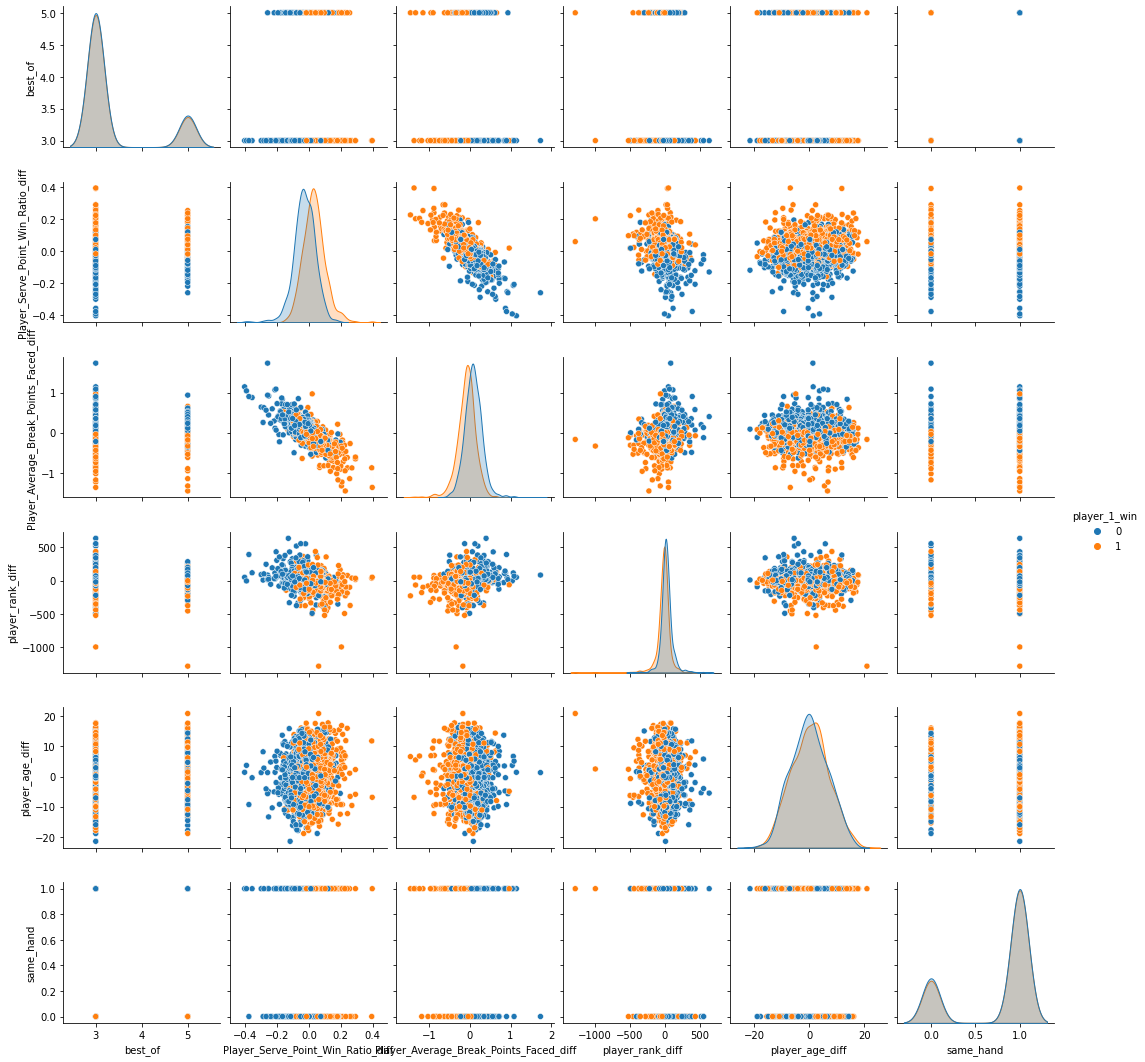

In [35]:
data_plot = sns.pairplot(atp_modelling_data, hue = 'player_1_win')

### Split into features and targets

In [36]:
feature_rolling = atp_modelling_data.drop('player_1_win', axis = 1)
target_rolling = atp_modelling_data['player_1_win']

from sklearn.model_selection import train_test_split

fr_train, fr_test, tr_train, tr_test = train_test_split(feature_rolling, target_rolling, test_size = 0.3,
                                                       random_state = 181)

### One hot encode the data

In [37]:
def one_hot_encode_df(df):
    
    from sklearn.preprocessing import OneHotEncoder
        
    surface_names = sorted(list(df['surface'].unique()))

    encoded_surface_train = OneHotEncoder(handle_unknown = 'ignore')
    encoded_surface_train.fit(np.array(df['surface']).reshape(-1, 1))
    encoded_surface_train = encoded_surface_train.transform(np.array(df['surface']).reshape(-1, 1)).toarray()

    surface_encoded_train = pd.DataFrame(encoded_surface_train, columns = surface_names)

    encoded_feature_train = pd.concat([df.reset_index(), surface_encoded_train], axis = 1)
    rolling_tennis_encoded_feature_train = encoded_feature_train.set_index(['index']).drop(['surface'], axis = 1)
    
    return rolling_tennis_encoded_feature_train
    

In [38]:
from sklearn.preprocessing import OneHotEncoder

surface_names = sorted(list(fr_train['surface'].unique()))

encoded_surface_train = OneHotEncoder(handle_unknown = 'ignore')
encoded_surface_train.fit(np.array(fr_train['surface']).reshape(-1, 1))
encoded_surface_train = encoded_surface_train.transform(np.array(fr_train['surface']).reshape(-1, 1)).toarray()

surface_encoded_train = pd.DataFrame(encoded_surface_train, columns = surface_names)

encoded_feature_train = pd.concat([fr_train.reset_index(), surface_encoded_train], axis = 1)
rolling_tennis_encoded_feature_train = encoded_feature_train.drop(['index', 'surface'], axis = 1)

In [39]:
rolling_tennis_encoded_feature_train = one_hot_encode_df(fr_train)

In [43]:
for i in rolling_tennis_encoded_feature_train.columns:
    print(i, rolling_tennis_encoded_feature_train[i].isna().sum())

best_of 0
Player_Serve_Point_Win_Ratio_diff 0
Player_Average_Break_Points_Faced_diff 0
player_rank_diff 0
player_age_diff 0
same_hand 0
Clay 0
Grass 0
Hard 0


In [44]:
rolling_tennis_encoded_feature_test = one_hot_encode_df(fr_test)

In [45]:
rolling_tennis_encoded_feature_train

,best_of,Player_Serve_Point_Win_Ratio_diff,Player_Average_Break_Points_Faced_diff,player_rank_diff,player_age_diff,same_hand,Clay,Grass,Hard
index,,,,,,,,,
1891,3,-0.000366,0.032938,10.0,5.2,1,0.0,0.0,1.0
1865,3,-0.084725,0.029402,127.0,1.6,1,0.0,0.0,1.0
1449,3,0.050953,-0.008157,-6.0,-2.3,1,0.0,1.0,0.0
986,3,0.006346,-0.071987,-26.0,-1.7,1,1.0,0.0,0.0
8,3,0.106718,-0.395833,-41.0,-4.8,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
358,3,0.015831,0.065257,-1.0,-3.0,0,1.0,0.0,0.0
2305,3,-0.050886,0.236334,47.0,-3.6,1,0.0,0.0,1.0
2361,3,-0.014399,0.176943,15.0,1.3,0,0.0,0.0,1.0


# Do some predictions on the data

In [74]:
from sklearn.metrics import plot_roc_curve

def create_roc_curve_folds(cvfold, train_data, train_target, classifier):
    
    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cvfold.split(train_data, train_target)):
        classifier.fit(train_data.iloc[train], train_target.iloc[train])
        roc = plot_roc_curve(classifier, train_data.iloc[test], train_target.iloc[test],
                             name = 'ROC fold ' + str(i + 1), alpha = 0.8, lw = 1, ax = ax)

## Decision Tree 

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

dt_kf10 = KFold(n_splits = 10, random_state = 181, shuffle = True)
dt_clf10 = DecisionTreeClassifier(random_state = 181)
score_dt_kf10 = cross_val_score(dt_clf10, rolling_tennis_encoded_feature_train, tr_train, cv = dt_kf10)
score_dt_kf10

array([0.56613757, 0.58730159, 0.53968254, 0.59259259, 0.5978836 ,
       0.57978723, 0.62234043, 0.60106383, 0.56382979, 0.54787234])

In [73]:
score_dt_kf10.mean()

0.5798491500619161

## Support Vector Machines

In [97]:
score_SVC_kf10.mean()

0.6116486547337611

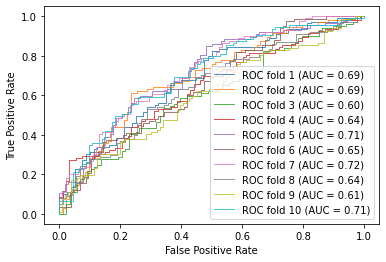

## Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

rnd_kf10 = KFold(n_splits = 10, random_state = 181, shuffle = True)
rnd_clf10 = RandomForestClassifier(n_estimators = 500, random_state = 181)
score_rnd_kf10 = cross_val_score(rnd_clf10, rolling_tennis_encoded_feature_train, tr_train, cv = rnd_kf10)
score_rnd_kf10

array([0.63492063, 0.66137566, 0.60846561, 0.61904762, 0.67724868,
       0.67021277, 0.66489362, 0.64361702, 0.61702128, 0.71276596])

In [77]:
score_rnd_kf10.mean()

0.6509568839356074

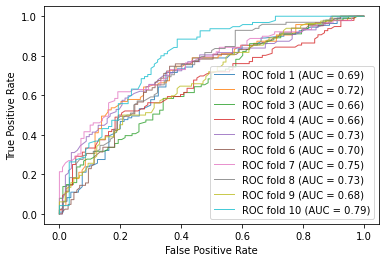

In [78]:
create_roc_curve_folds(rnd_kf10, rolling_tennis_encoded_feature_train, tr_train, rnd_clf10)

# Normalise the data for SVM and KNN

In [101]:
data_need_normalising = rolling_tennis_encoded_feature_train.loc[:, ["Player_Serve_Point_Win_Ratio_diff",
                                                                     "Player_Average_Break_Points_Faced_diff",
                                                                     "player_rank_diff", "player_age_diff"]]

In [111]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
scaled_data = Scaler.fit_transform(data_need_normalising)

In [112]:
scaled_data

array([[-0.02101703,  0.1441888 ,  0.11818046,  0.75802372],
       [-1.14311503,  0.12974201,  1.42190745,  0.22497754],
       [ 0.66158366, -0.02370474, -0.06010699, -0.35248916],
       ...,
       [-0.20768102,  0.732521  ,  0.17389529,  0.18055702],
       [-0.05140784, -0.03280695,  0.25189605, -2.66235596],
       [-0.33664026, -0.02303276,  0.48589833, -0.20442078]])

In [113]:
new_index = data_need_normalising.index
new_columns = data_need_normalising.columns

In [120]:
scaled_df = pd.DataFrame(scaled_data, index = new_index, columns = new_columns)

In [124]:
normalised_all_data = pd.concat([scaled_df,
                                 rolling_tennis_encoded_feature_train.loc[:, ["best_of", "same_hand", "Clay", "Grass", "Hard"]]],
                                axis = 1)

In [125]:
scaled_rolling_tennis_encoded_feature_train = normalised_all_data.loc[:, rolling_tennis_encoded_feature_train.columns]

## Support Vector Machines

### Linear

In [168]:
from sklearn.svm import SVC

SVC_kf10 = KFold(n_splits = 10, random_state = 181, shuffle = True)
SVC_clf10 = SVC(random_state = 181, C = 0.01, kernel = "linear")
score_SVC_kf10 = cross_val_score(SVC_clf10, scaled_rolling_tennis_encoded_feature_train, tr_train, cv = SVC_kf10)
score_SVC_kf10

array([0.64021164, 0.68253968, 0.62433862, 0.68783069, 0.72486772,
       0.73404255, 0.72340426, 0.67021277, 0.64361702, 0.70744681])

In [169]:
score_SVC_kf10.mean()

0.6838511764043679

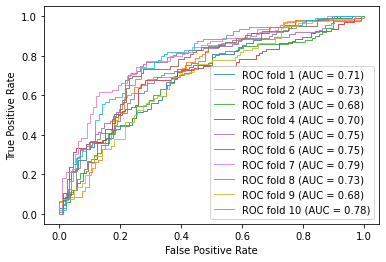

In [177]:
create_roc_curve_folds(SVC_kf10, scaled_rolling_tennis_encoded_feature_train, tr_train, SVC_clf10)

### RBF

In [172]:
SVC_kf10 = KFold(n_splits = 10, random_state = 181, shuffle = True)
SVC_clf10 = SVC(random_state = 181, C = 10, kernel = "rbf")
score_SVC_kf10 = cross_val_score(SVC_clf10, scaled_rolling_tennis_encoded_feature_train, tr_train, cv = SVC_kf10)
score_SVC_kf10

array([0.62433862, 0.68783069, 0.62962963, 0.66137566, 0.74074074,
       0.72340426, 0.74468085, 0.67553191, 0.65425532, 0.71808511])

In [173]:
score_SVC_kf10.mean()

0.6859872790723855

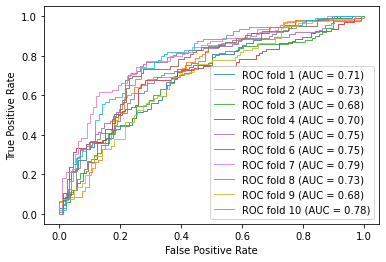

In [178]:
create_roc_curve_folds(SVC_kf10, scaled_rolling_tennis_encoded_feature_train, tr_train, SVC_clf10)

### K Nearest Neighbours

In [187]:
from sklearn.neighbors import KNeighborsClassifier

knn_kf10 = KFold(n_splits = 10, random_state = 181, shuffle = True)
knn_clf10 = KNeighborsClassifier(n_neighbors = 31)
score_knn_kf10 = cross_val_score(knn_clf10, scaled_rolling_tennis_encoded_feature_train, tr_train, cv = knn_kf10)
score_knn_kf10

array([0.64021164, 0.68783069, 0.65079365, 0.63492063, 0.68253968,
       0.67021277, 0.74468085, 0.64893617, 0.60638298, 0.7287234 ])

In [188]:
score_knn_kf10.mean()

0.6695232466509063

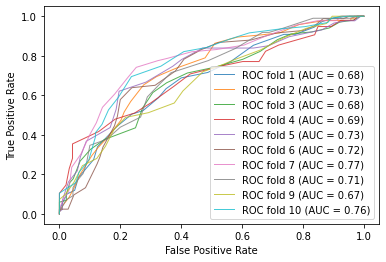

In [189]:
create_roc_curve_folds(knn_kf10, scaled_rolling_tennis_encoded_feature_train, tr_train, knn_clf10)